# CHATGPT REVIEW - SENTIMENTAL ANALYSIS - GRU - IMPLEMENTATION

In [70]:
import warnings
warnings.filterwarnings("ignore")

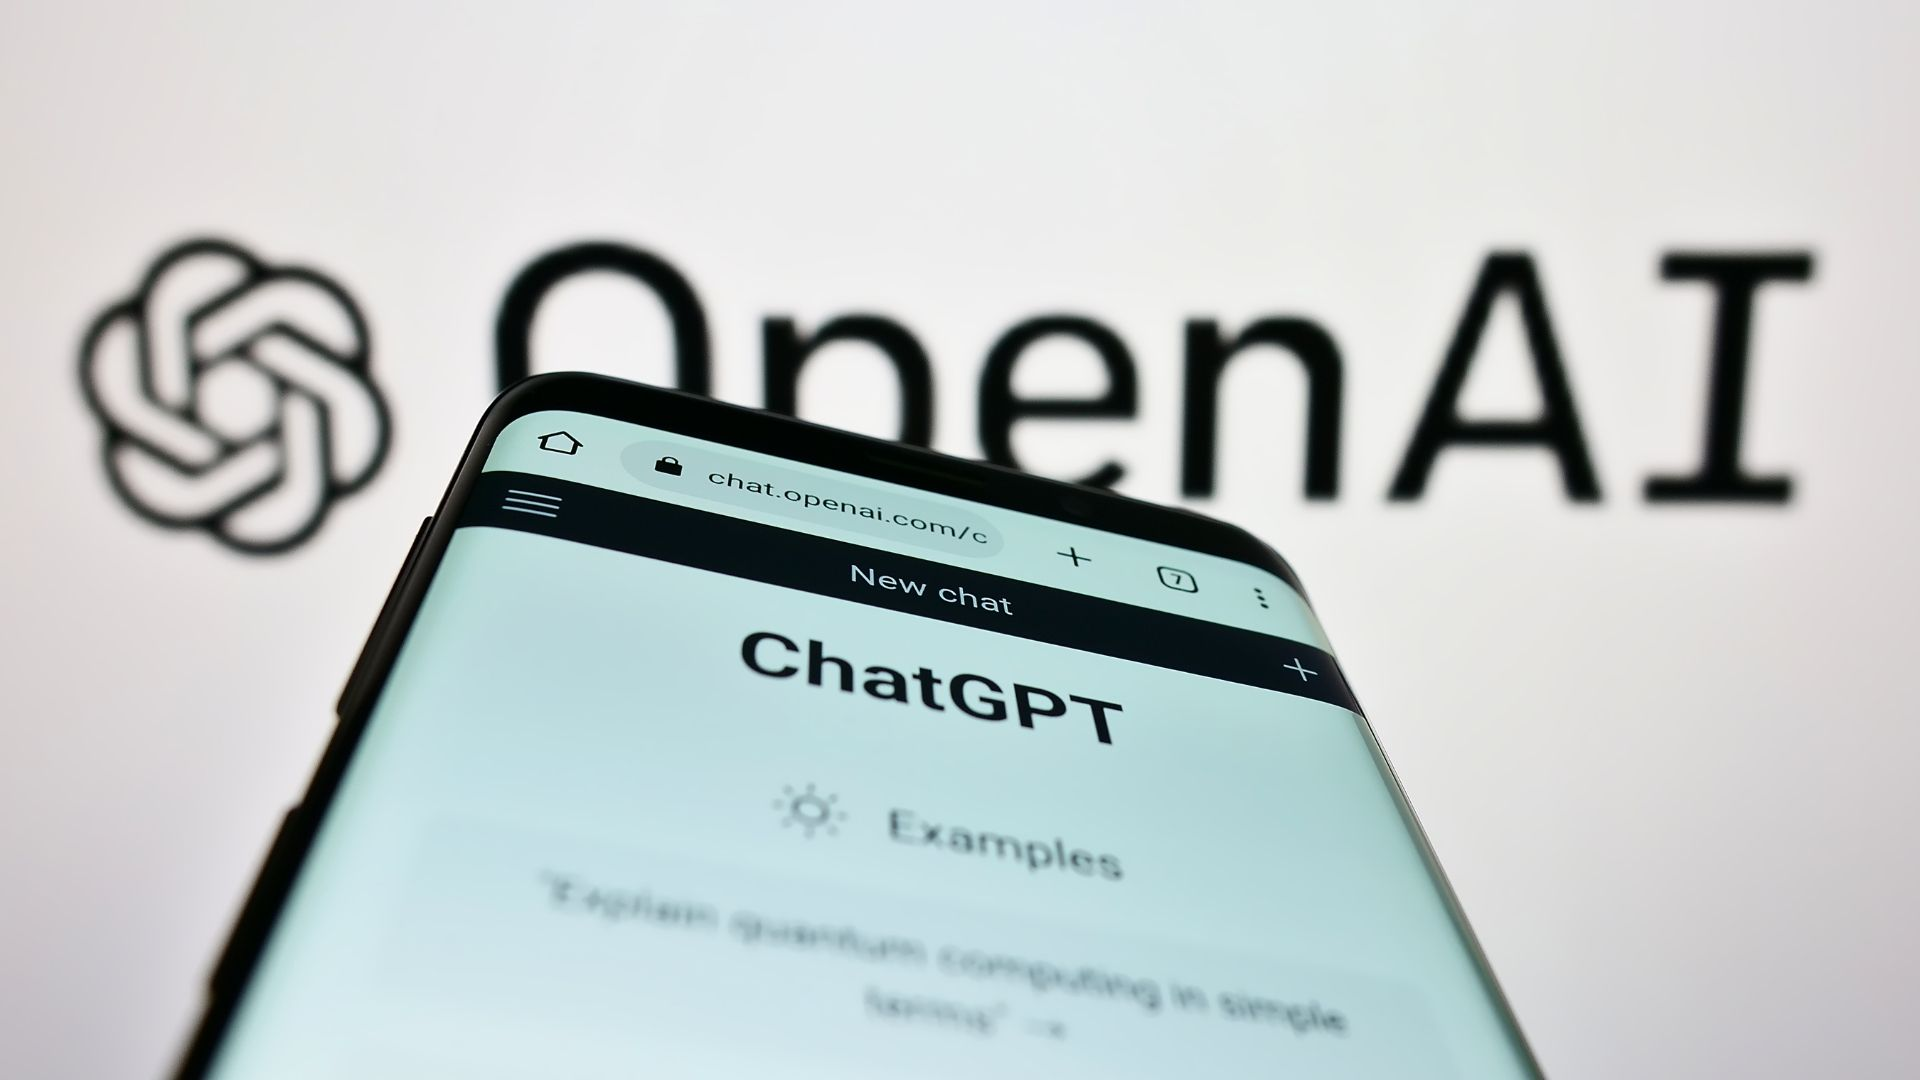

In [191]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [73]:
# Loading Dataset
df = pd.read_csv("chatgpt_reviews.csv",  encoding = "ISO-8859-1")
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,7d28d891-9ee7-40b2-950f-7dba0a6c437a,Juned Shaikh,best app,5,0,1.2025.203,2025-08-07 10:06:06,1.2025.203
1,a585f1f2-962b-4107-a7e8-ac61bfaf3d0c,Sunil Shinde,ok,5,0,1.2025.203,2025-08-07 10:06:06,1.2025.203
2,dbf2a0be-71cc-4e0c-b113-9176ee99054e,Shudhanshu Rajwade,ðnice,5,0,1.2025.161,2025-08-07 10:05:47,1.2025.161
3,82f11abc-6fcc-43b9-ba71-bbbde59caeb1,Kamlakar Palnate,very Nice ap for 3d image create,1,1,1.2025.210,2025-08-07 10:05:13,1.2025.210
4,3889be8b-1405-4e03-9666-a775d4063a36,harshrajsinhji vagad,best application,5,0,1.2025.182,2025-08-07 10:05:08,1.2025.182
...,...,...,...,...,...,...,...,...
726332,462686ff-e500-413c-a6b4-2badc2e3b21d,m.santhosh Kumar,Update 2023,5,0,NaN,2023-07-27 16:26:31,NaN
726333,f10e0d48-ecb6-42db-b103-46c0046f9be9,Andrew Bourgeois,its grear,5,0,NaN,2023-09-23 16:25:18,NaN
726334,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Dern Bob,Funtastic App,5,0,NaN,2023-11-08 13:57:14,NaN
726335,abe43878-973f-4e96-a765-c4af5c7f7b20,Abdur rahman arif,hi all,5,0,NaN,2023-07-25 15:32:57,NaN


## EXPLORATORY DATA ANALYSIS ( EDA ) AND FEATURE ENGINEERING

In [74]:
# Score - Value counts
df['score'].value_counts()

score
5    561606
4     77034
1     44802
3     29825
2     13070
Name: count, dtype: int64

In [75]:
# Select Required Data
df = df[["content","score"]]
df

,content,score
0,best app,5
1,ok,5
2,ðnice,5
3,very Nice ap for 3d image create,1
4,best application,5
...,...,...
726332,Update 2023,5
726333,its grear,5
726334,Funtastic App,5
726335,hi all,5


In [76]:
# Chekcing Null Values
df.isna().sum()

content    13
score       0
dtype: int64

## FINAL DATASET

In [77]:
df.dropna(inplace=True)
df

,content,score
0,best app,5
1,ok,5
2,ðnice,5
3,very Nice ap for 3d image create,1
4,best application,5
...,...,...
726332,Update 2023,5
726333,its grear,5
726334,Funtastic App,5
726335,hi all,5


In [78]:
df.isna().sum().sum()

0

In [79]:
# Checking Duplicates
df.duplicated().sum()

344766

In [80]:
df['score'].value_counts()

score
5    561600
4     77033
1     44798
3     29823
2     13070
Name: count, dtype: int64

In [81]:
df = df.drop_duplicates(subset=['content'])

In [82]:
df.duplicated().sum()

0

In [83]:
def map_sentiment(score):
    if score in [1, 2]:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df['sentiment'] = df['score'].apply(map_sentiment)

In [84]:
df['sentiment'].value_counts().sort_index()

sentiment
0     41492
1     17227
2    310200
Name: count, dtype: int64

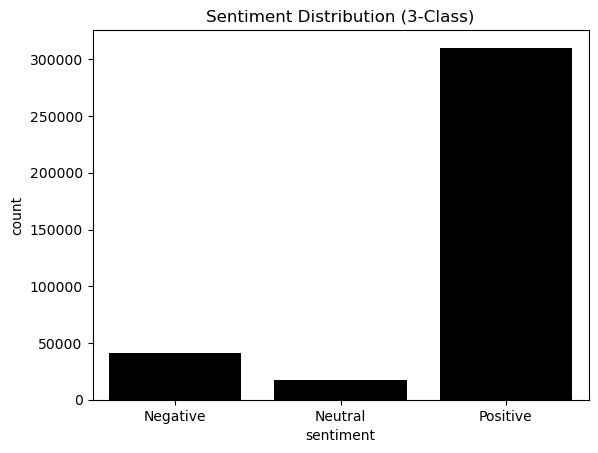

In [100]:
# Visualising Sentiment
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df, color = "black")
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution (3-Class)')
plt.show()

## CLEAN THE CONTENT

In [102]:
# Clean the content

def clean_text(content):
    content = re.sub(r"http\S+", "", content)               # Remove URLs
    content = re.sub(r"@\w+", "", content)                  # Remove mentions
    content = re.sub(r"#(\w+)", r"\1", content)             # Keep hashtag words
    content = re.sub(r"[^A-Za-z0-9\s]", "", content)        # Remove punctuation
    content = re.sub(r"\s+", " ", content).strip()          # Remove extra spaces
    return content.lower()

In [104]:
df['clean_text'] = df['content'].astype(str).apply(clean_text)

In [106]:
# Setting Max-Word
max_words = 10000  # By Default
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

## SAVE THE TOKENIZER

In [193]:
# Save the Tokenizer
with open('tokenizer_gru_chatgpt.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [108]:
# Exploring Review length to set max-length -- Number of Words / Review
review_lengths = df['clean_text'].apply(lambda x: len(x.split()))

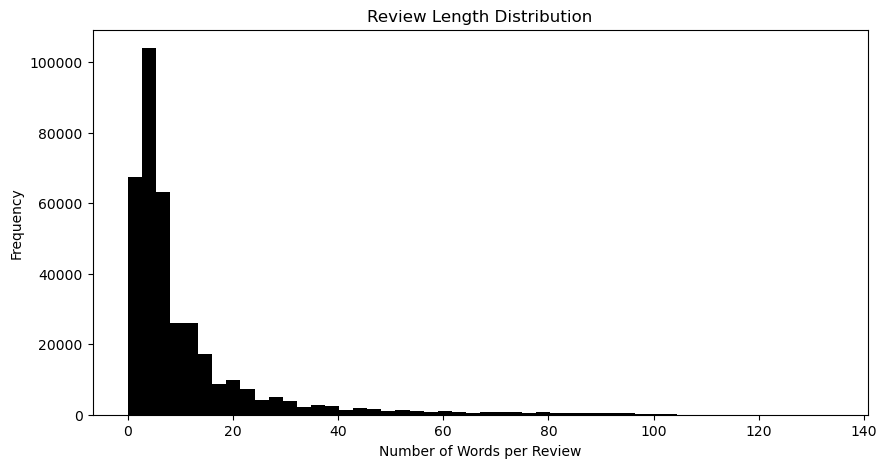

In [110]:
# Plotting 
plt.figure(figsize=(10,5))
plt.hist(review_lengths, bins=50, color='black')
plt.title("Review Length Distribution")
plt.xlabel("Number of Words per Review")
plt.ylabel("Frequency")
plt.show()

In [116]:
# Setting Optimum Maximum length for the sequence, (i.e., how many words per review to keep) before padding or truncating for your GRU model.
max_len = int(np.percentile(review_lengths, 90))
print("Max Sequence Length:", max_len)

Max Sequence Length: 26


In [ ]:
# Converts each cleaned review into a list of integers.
# Each word is replaced by its corresponding index in the tokenizer’s word index.

In [118]:
# Converting texts to Sequences and Pad
sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [120]:
# Setting Target Variables
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])  # Values: 0, 1, 2
y_categorical = to_categorical(y_encoded)  # Converts to one-hot encoded format

## SAVE LABEL ENCODER - CHATGPT

In [195]:
# Save label encoder
with open('label_encoder_gru_chatgpt.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

## TRAIN - TEST - SPLIT

In [139]:
# Train - Test - Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)
# padded_sequences : This is your input (X), cleaned and padded review text
# y_categorical	: This is your one-hot encoded sentiment label (multi-class: [1,0,0], [0,1,0], etc)
# stratify=y_encoded:Ensures class balance is maintained (same ratio of pos/neg/neutral) in both train/test

## BUILDING THE MODEL

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

vocab_size = len(tokenizer.word_index) + 1  # Total unique words + 1 for OOV
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 sentiment classes

In [143]:
# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [149]:
model.build(input_shape=(None, max_len))

In [151]:
# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 26, 128)             │      10,617,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,659,075 (40.66 MB)

 Trainable params: 10,659,075 (40.66 MB)

 Non-trainable params: 0 (0.00 B)

## TRAIN THE MODEL

In [157]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training set used for validation
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/10
7379/7379 ━━━━━━━━━━━━━━━━━━━━ 674s 90ms/step - accuracy: 0.8738 - loss: 0.4089 - val_accuracy: 0.8945 - val_loss: 0.3340
Epoch 2/10
7379/7379 ━━━━━━━━━━━━━━━━━━━━ 991s 134ms/step - accuracy: 0.8989 - loss: 0.3223 - val_accuracy: 0.8958 - val_loss: 0.3281
Epoch 3/10
7379/7379 ━━━━━━━━━━━━━━━━━━━━ 621s 84ms/step - accuracy: 0.9036 - loss: 0.3069 - val_accuracy: 0.8961 - val_loss: 0.3280
Epoch 4/10
7379/7379 ━━━━━━━━━━━━━━━━━━━━ 631s 85ms/step - accuracy: 0.9082 - loss: 0.2925 - val_accuracy: 0.8938 - val_loss: 0.3362
Epoch 5/10
7379/7379 ━━━━━━━━━━━━━━━━━━━━ 634s 86ms/step - accuracy: 0.9117 - loss: 0.2818 - val_accuracy: 0.8922 - val_loss: 0.3393
Epoch 6/10
7379/7379 ━━━━━━━━━━━━━━━━━━━━ 634s 86ms/step - accuracy: 0.9182 - loss: 0.2665 - val_accuracy: 0.8903 - val_loss: 0.3532


## TEST THE MODEL

In [177]:
# Loss and Accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

2306/2306 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8934 - loss: 0.3366
Test Loss: 0.3336
Test Accuracy: 0.8947


## PLOTING ACCURACY & LOSS

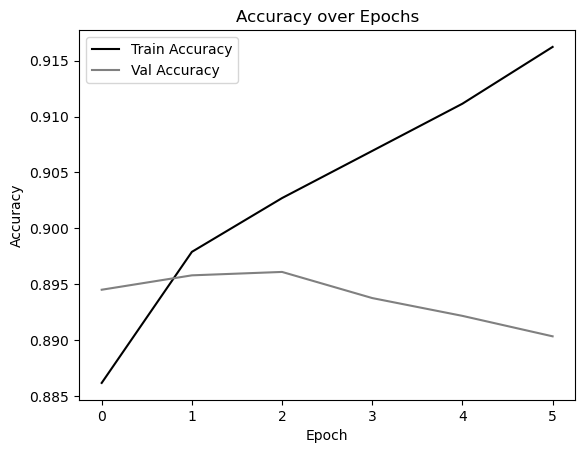

In [179]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', color = "black")
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color = "grey")
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

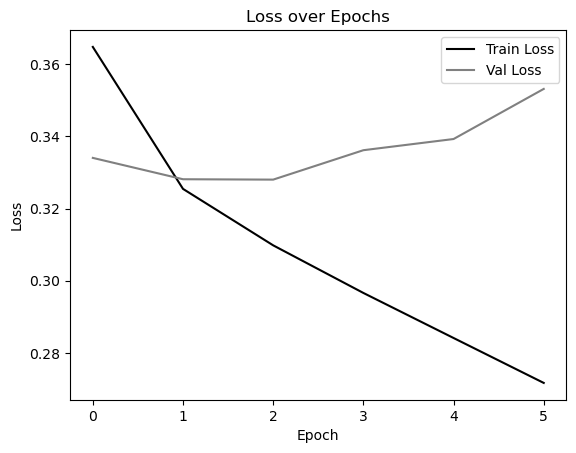

In [183]:
# Loss
plt.plot(history.history['loss'], label='Train Loss', color = 'black')
plt.plot(history.history['val_loss'], label='Val Loss',color = 'grey')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## PREDICT NEW TEXT

In [189]:
sample_text = "I really loved the experience"

# Clean the text
cleaned = clean_text(sample_text)

# Tokenize and pad
seq = tokenizer.texts_to_sequences([cleaned])
padded = pad_sequences(seq, maxlen=max_len, padding='post')

# Predict
pred = model.predict(padded)

# Get the predicted label
pred_class_index = np.argmax(pred)
predicted_label = label_encoder.inverse_transform([pred_class_index])[0]

# Show result
print("Prediction Probabilities:", pred)
print("Predicted Sentiment:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction Probabilities: [[0.00910997 0.00941505 0.981475  ]]
Predicted Sentiment: 2


## SAVE THE MODEL

In [197]:
model.save("sentiment_model_gru_chatgpt.keras")